<a href="https://colab.research.google.com/github/dixitritik17/Analysis-of-Meteorological-Data/blob/main/Performing_Analysis_of_Weather_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Performing Analysis of Meteorological Data**

In [ ]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [ ]:
dataset= pd.read_csv("weatherHistory.csv")

## **2. View the Data**



In [ ]:
dataset.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [ ]:
dataset.head(4)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.


## **3. Removing unwanted columns**

In [ ]:
dataset=dataset.drop(['Summary','Precip Type','Temperature (C)','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)',
                           'Pressure (millibars)','Daily Summary'], axis = 1)

In [ ]:
dataset.head()

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83


Checking for Null values

In [ ]:
dataset.isnull().sum()

Formatted Date              0
Apparent Temperature (C)    0
Humidity                    0
dtype: int64

## **Resampling**

In [ ]:
dataset['Formatted Date']=pd.to_datetime(dataset['Formatted Date'],utc=True)
dataset1=dataset.set_index('Formatted Date')
dataset1=dataset1.resample('MS').mean()

In [ ]:
dataset1.head(8)

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
2006-05-01 00:00:00+00:00,15.539479,0.721801
2006-06-01 00:00:00+00:00,19.535965,0.747125
2006-07-01 00:00:00+00:00,23.595348,0.656304


## **Plotting**

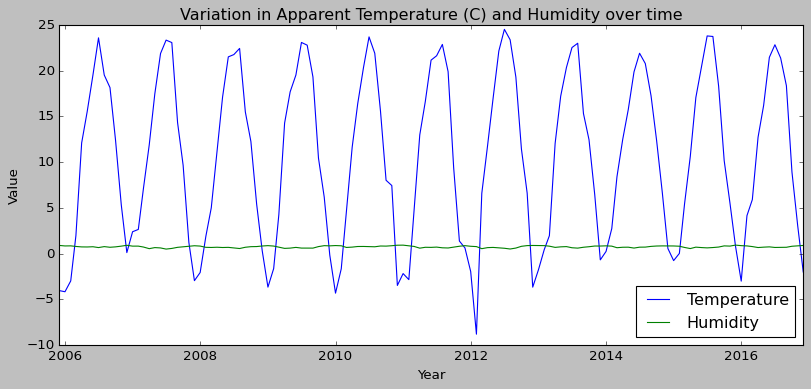

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(dataset1)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Variation in Apparent Temperature (C) and Humidity over time')
plt.legend(['Temperature','Humidity'],loc=4)
plt.style.use(['classic'])

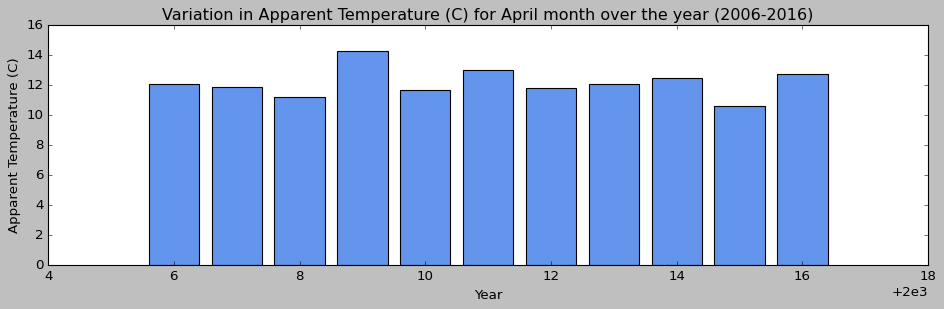

In [ ]:
data=dataset1[dataset1.index.month==4]

fig = plt.figure(figsize=(11,3))
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(data.index.year, data['Apparent Temperature (C)'], color='cornflowerblue', edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Apparent Temperature (C)')
plt.title('Variation in Apparent Temperature (C) for April month over the year (2006-2016)')
plt.show()

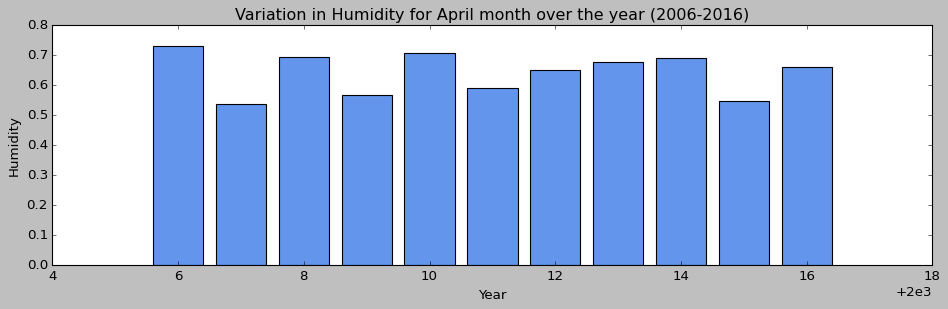

In [ ]:
fig = plt.figure(figsize=(11,3))
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(data.index.year, data['Humidity'], color='cornflowerblue', edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Humidity')
plt.title('Variation in Humidity for April month over the year (2006-2016)')
plt.show()

Text(0.5, 1.0, 'Apparent Temperature (C) and Humidity for the month of January over 2006-2016')

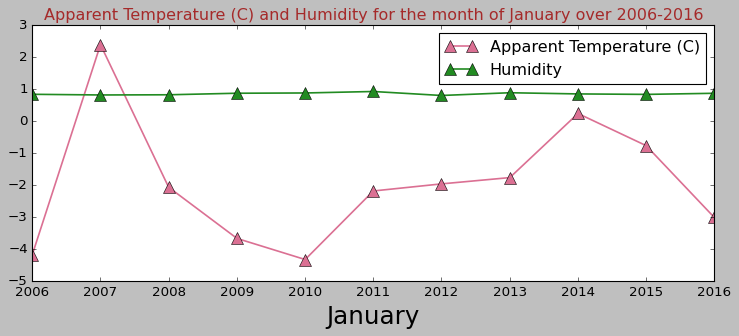

In [ ]:
jan=dataset1[dataset1.index.month==1]

plt.figure(figsize=(11,4))
plt.plot(jan['Apparent Temperature (C)'],marker='^', color='palevioletred', linewidth=1.5, markersize=10)
plt.plot(jan['Humidity'], marker='^', color='forestgreen', linewidth=1.5, markersize=10)
plt.legend(["Apparent Temperature (C)","Humidity"])
plt.xlabel("January", fontsize=22)
plt.title("Apparent Temperature (C) and Humidity for the month of January over 2006-2016", color='Brown')

Text(0.5, 1.0, 'Apparent Temperature (C) and Humidity for the month of February over 2006-2016')

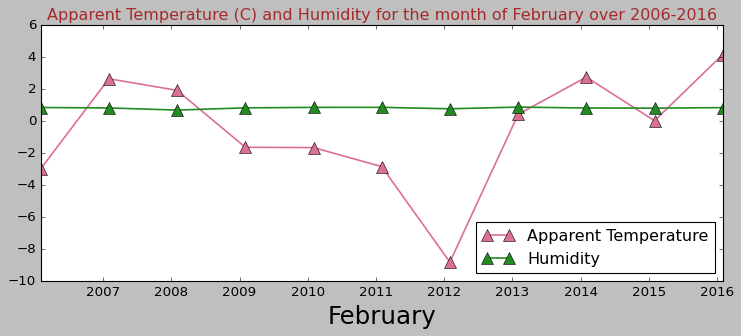

In [ ]:
feb=dataset1[dataset1.index.month==2]

plt.figure(figsize=(11,4))
plt.plot(feb['Apparent Temperature (C)'],marker='^', color='palevioletred', linewidth=1.5, markersize=10)
plt.plot(feb['Humidity'], marker='^', color='forestgreen', linewidth=1.5, markersize=10)
plt.legend(["Apparent Temperature","Humidity"],loc=4)
plt.xlabel("February", fontsize=22)
plt.title("Apparent Temperature (C) and Humidity for the month of February over 2006-2016", color='Brown')

Text(0.5, 1.0, 'Apparent Temperature (C) and Humidity for the month of March over 2006-2016')

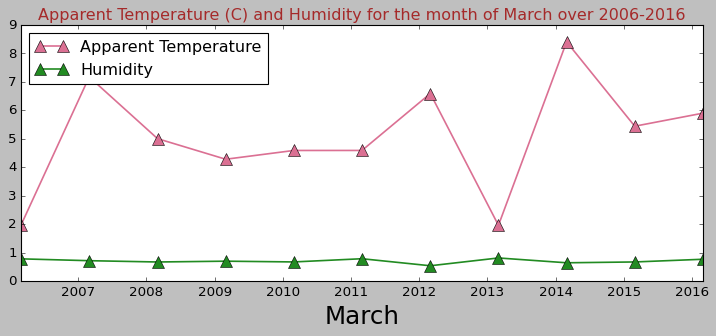

In [ ]:
march=dataset1[dataset1.index.month==3]

plt.figure(figsize=(11,4))
plt.plot(march['Apparent Temperature (C)'],marker='^', color='palevioletred', linewidth=1.5, markersize=10)
plt.plot(march['Humidity'], marker='^', color='forestgreen', linewidth=1.5, markersize=10)
plt.legend(["Apparent Temperature","Humidity"],loc=2)
plt.xlabel("March", fontsize=22)
plt.title("Apparent Temperature (C) and Humidity for the month of March over 2006-2016", color='Brown')

Text(0.5, 1.0, 'Apparent Temperature (C) and Humidity for the month of April over 2006-2016')

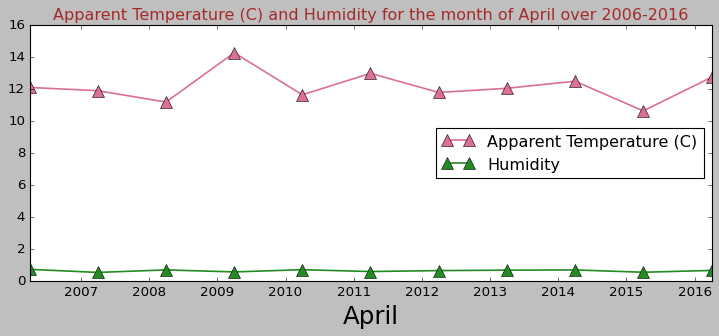

In [ ]:
april=dataset1[dataset1.index.month==4]

plt.figure(figsize=(11,4))
plt.plot(april['Apparent Temperature (C)'],marker='^', color='palevioletred', linewidth=1.5, markersize=10)
plt.plot(april['Humidity'], marker='^', color='forestgreen', linewidth=1.5, markersize=10)
plt.legend(["Apparent Temperature (C)","Humidity"],loc=5)
plt.xlabel("April", fontsize=22)
plt.title("Apparent Temperature (C) and Humidity for the month of April over 2006-2016", color='Brown')

Text(0.5, 1.0, 'Apparent Temperature (C) and Humidity for the month of May over 2006-2016')

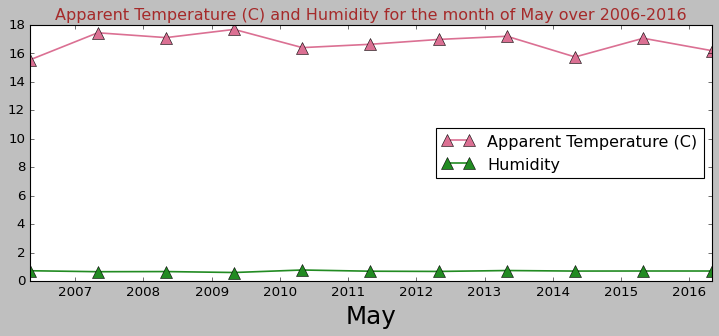

In [ ]:
may=dataset1[dataset1.index.month==5]

plt.figure(figsize=(11,4))
plt.plot(may['Apparent Temperature (C)'],marker='^', color='palevioletred', linewidth=1.5, markersize=10)
plt.plot(may['Humidity'], marker='^', color='forestgreen', linewidth=1.5, markersize=10)
plt.legend(["Apparent Temperature (C)","Humidity"],loc=5)
plt.xlabel("May", fontsize=22)
plt.title("Apparent Temperature (C) and Humidity for the month of May over 2006-2016", color='Brown')

Text(0.5, 1.0, 'Apparent Temperature (C) and Humidity for the month of June over 2006-2016')

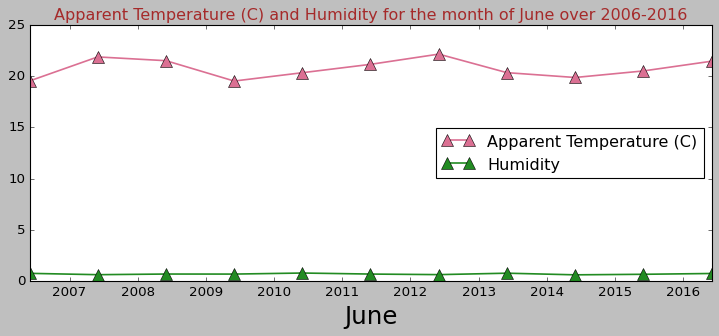

In [ ]:
june=dataset1[dataset1.index.month==6]

plt.figure(figsize=(11,4))
plt.plot(june['Apparent Temperature (C)'],marker='^', color='palevioletred', linewidth=1.5, markersize=10)
plt.plot(june['Humidity'], marker='^', color='forestgreen', linewidth=1.5, markersize=10)
plt.legend(["Apparent Temperature (C)","Humidity"],loc=5)
plt.xlabel("June", fontsize=22)
plt.title("Apparent Temperature (C) and Humidity for the month of June over 2006-2016", color='Brown')

Text(0.5, 1.0, 'Apparent Temperature (C) and Humidity for the month of July over 2006-2016')

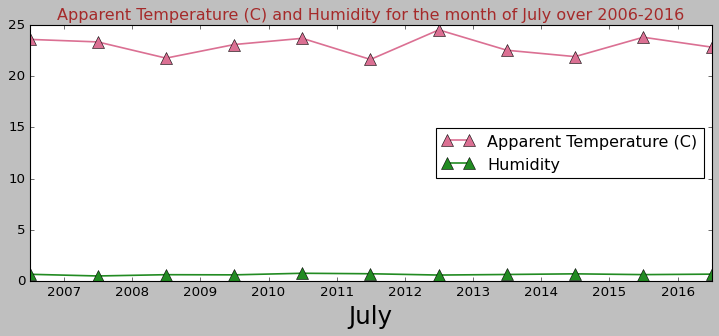

In [ ]:
july=dataset1[dataset1.index.month==7]

plt.figure(figsize=(11,4))
plt.plot(july['Apparent Temperature (C)'],marker='^', color='palevioletred', linewidth=1.5, markersize=10)
plt.plot(july['Humidity'], marker='^', color='forestgreen', linewidth=1.5, markersize=10)
plt.legend(["Apparent Temperature (C)","Humidity"],loc=5)
plt.xlabel("July", fontsize=22)
plt.title("Apparent Temperature (C) and Humidity for the month of July over 2006-2016", color='Brown')

Text(0.5, 1.0, 'Apparent Temperature (C) and Humidity for the month of August over 2006-2016')

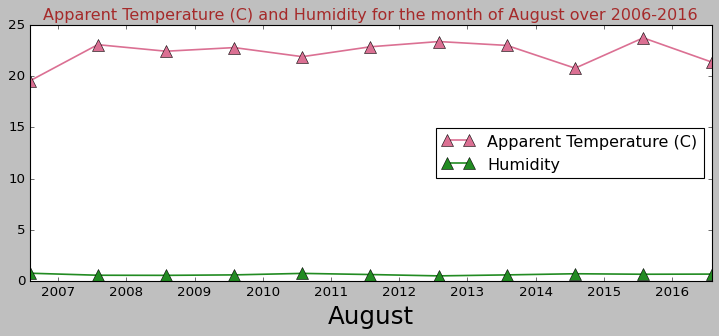

In [ ]:
aug=dataset1[dataset1.index.month==8]

plt.figure(figsize=(11,4))
plt.plot(aug['Apparent Temperature (C)'],marker='^', color='palevioletred', linewidth=1.5, markersize=10)
plt.plot(aug['Humidity'], marker='^', color='forestgreen', linewidth=1.5, markersize=10)
plt.legend(["Apparent Temperature (C)","Humidity"],loc=5)
plt.xlabel("August", fontsize=22)
plt.title("Apparent Temperature (C) and Humidity for the month of August over 2006-2016", color='Brown')

Text(0.5, 1.0, 'Apparent Temperature (C) and Humidity for the month of September over 2006-2016')

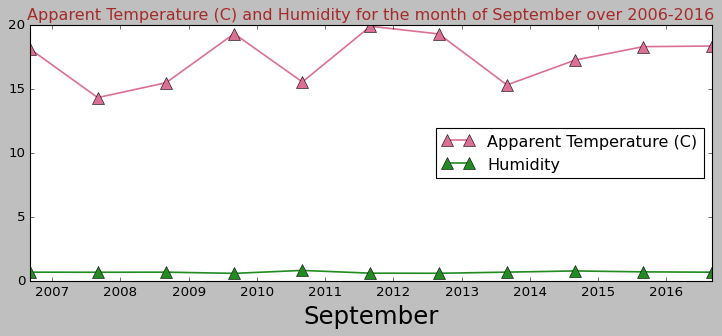

In [ ]:
sept=dataset1[dataset1.index.month==9]

plt.figure(figsize=(11,4))
plt.plot(sept['Apparent Temperature (C)'],marker='^', color='palevioletred', linewidth=1.5, markersize=10)
plt.plot(sept['Humidity'], marker='^', color='forestgreen', linewidth=1.5, markersize=10)
plt.legend(["Apparent Temperature (C)","Humidity"],loc=5)
plt.xlabel("September", fontsize=22)
plt.title("Apparent Temperature (C) and Humidity for the month of September over 2006-2016", color='Brown')

Text(0.5, 1.0, 'Apparent Temperature (C) and Humidity for the month of October over 2006-2016')

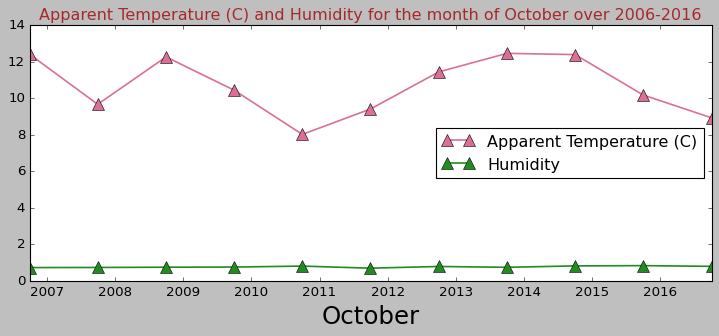

In [ ]:
oct=dataset1[dataset1.index.month==10]

plt.figure(figsize=(11,4))
plt.plot(oct['Apparent Temperature (C)'],marker='^', color='palevioletred', linewidth=1.5, markersize=10)
plt.plot(oct['Humidity'], marker='^', color='forestgreen', linewidth=1.5, markersize=10)
plt.legend(["Apparent Temperature (C)","Humidity"],loc=5)
plt.xlabel("October", fontsize=22)
plt.title("Apparent Temperature (C) and Humidity for the month of October over 2006-2016", color='Brown')

Text(0.5, 1.0, 'Apparent Temperature (C) and Humidity for the month of November over 2006-2016')

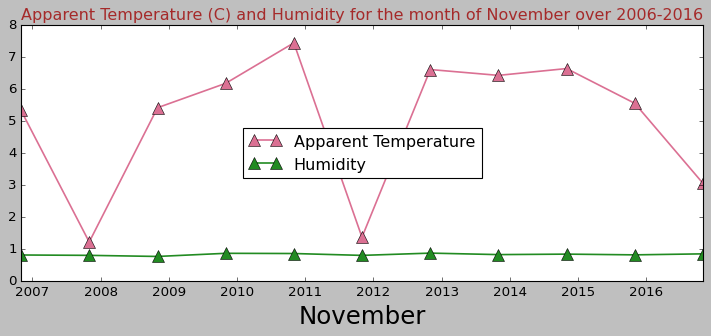

In [ ]:
nov=dataset1[dataset1.index.month==11]

plt.figure(figsize=(11,4))
plt.plot(nov['Apparent Temperature (C)'],marker='^', color='palevioletred', linewidth=1.5, markersize=10)
plt.plot(nov['Humidity'], marker='^', color='forestgreen', linewidth=1.5, markersize=10)
plt.legend(["Apparent Temperature","Humidity"],loc=10)
plt.xlabel("November", fontsize=22)
plt.title("Apparent Temperature (C) and Humidity for the month of November over 2006-2016", color='Brown')

Text(0.5, 1.0, 'Apparent Temperature (C) and Humidity for the month of December over 2006-2016')

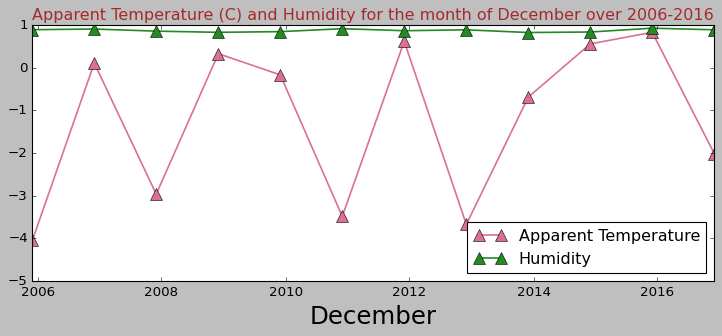

In [ ]:
dec=dataset1[dataset1.index.month==12]

plt.figure(figsize=(11,4))
plt.plot(dec['Apparent Temperature (C)'],marker='^', color='palevioletred', linewidth=1.5, markersize=10)
plt.plot(dec['Humidity'], marker='^', color='forestgreen', linewidth=1.5, markersize=10)
plt.legend(["Apparent Temperature","Humidity"],loc=4)
plt.xlabel("December", fontsize=22)
plt.title("Apparent Temperature (C) and Humidity for the month of December over 2006-2016", color='Brown')